In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df = pd.read_excel(r'C:\Users\acer\truth_table.xlsx')

In [3]:
df

,Strong Structure,Support,Tightly Planked,Wear Proper harness,Distance from electric line > 10 m,Base/Landing Surface,Proper PPE kits,Training to workers,Toeboard,Safe,Sever,Injury
0,0,0,0,0,0,0,0,0,0,0,1,1
1,0,0,0,0,0,0,0,0,1,0,1,1
2,0,0,0,0,0,0,0,1,0,0,1,1
3,0,0,0,0,0,0,0,1,1,0,1,1
4,0,0,0,0,0,0,1,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
507,1,1,1,1,1,1,0,1,1,0,1,1
508,1,1,1,1,1,1,1,0,0,0,0,1
509,1,1,1,1,1,1,1,0,1,0,0,1
510,1,1,1,1,1,1,1,1,0,1,0,0


In [4]:
df.head()

,Strong Structure,Support,Tightly Planked,Wear Proper harness,Distance from electric line > 10 m,Base/Landing Surface,Proper PPE kits,Training to workers,Toeboard,Safe,Sever,Injury
0,0,0,0,0,0,0,0,0,0,0,1,1
1,0,0,0,0,0,0,0,0,1,0,1,1
2,0,0,0,0,0,0,0,1,0,0,1,1
3,0,0,0,0,0,0,0,1,1,0,1,1
4,0,0,0,0,0,0,1,0,0,0,1,1


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 512 entries, 0 to 511
Data columns (total 12 columns):
 #   Column                              Non-Null Count  Dtype
---  ------                              --------------  -----
 0   Strong Structure                    512 non-null    int64
 1   Support                             512 non-null    int64
 2   Tightly Planked                     512 non-null    int64
 3   Wear Proper harness                 512 non-null    int64
 4   Distance from electric line > 10 m  512 non-null    int64
 5   Base/Landing Surface                512 non-null    int64
 6   Proper PPE kits                     512 non-null    int64
 7   Training to workers                 512 non-null    int64
 8   Toeboard                            512 non-null    int64
 9   Safe                                512 non-null    int64
 10  Sever                               512 non-null    int64
 11  Injury                              512 non-null    int64
dtypes: int64

# Building the model

# 1. Decision tree

## A)For safe cases:

In [6]:
from sklearn.model_selection import train_test_split

In [7]:
from sklearn import tree
model = tree.DecisionTreeClassifier()

In [8]:
X = df.drop(['Safe','Sever','Injury'],axis = 1)


In [9]:
y = df['Safe']

In [10]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.1)

### Calculating the lengths

In [11]:
len(X_train)


460

In [12]:
len(X_test)

52

In [13]:
len(y_test)

52

In [14]:
len(y_train)

460

### Fitting the model

In [15]:
model.fit(X_train,y_train)

DecisionTreeClassifier()

### Prediction

In [16]:
model.predict([[0,0,0,1,1,1,0,0,1]])

array([0], dtype=int64)

In [17]:
model.predict([[1,1,1,1,1,0,1,1,0]])

array([1], dtype=int64)

In [18]:
y_predicted = model.predict(X_test)

In [51]:
import pickle

In [52]:
pickle.dump(model, open('model.pkl','wb'))

In [19]:
model.score(X_test,y_test)

1.0

### Confusion matrix

In [20]:
from sklearn.metrics import confusion_matrix

In [21]:
cm = confusion_matrix(y_test,y_predicted)

In [22]:
cm

array([[52]], dtype=int64)

### Classification Report

In [23]:
from sklearn.metrics import classification_report

In [24]:
print(classification_report(y_test, y_predicted))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        52

    accuracy                           1.00        52
   macro avg       1.00      1.00      1.00        52
weighted avg       1.00      1.00      1.00        52



## B) For sever cases:

In [25]:
y_sever = df['Sever']

In [26]:
X_sever_train,X_sever_test,y_sever_train,y_sever_test = train_test_split(X,y_sever,test_size=0.1)

In [27]:
print('length of X_sever_train: ',len(X_sever_train))
print('length of X_sever_test: ',len(X_sever_test))
print('length of y_sever_train: ',len(y_sever_train))
print('length of y_sever_test: ',len(y_sever_test))

length of X_sever_train:  460
length of X_sever_test:  52
length of y_sever_train:  460
length of y_sever_test:  52


In [28]:
model_sever = tree.DecisionTreeClassifier()

In [29]:
model_sever.fit(X_sever_train,y_sever_train)

DecisionTreeClassifier()

In [30]:
y_sever_predicted = model_sever.predict(X_sever_test)

In [53]:
pickle.dump(model_sever, open('model_sever.pkl','wb'))

In [31]:

model_test_s = model_sever.score(X_sever_test,y_sever_test)
model_train_s = model_sever.score(X_sever_train,y_sever_train)

In [32]:
print('Test score: ',model_test_s)
print('Train score: ',model_train_s)

Test score:  1.0
Train score:  1.0


In [33]:
cm_sever = confusion_matrix(y_sever_test,y_sever_predicted)

In [34]:
cm_sever

array([[ 1,  0],
       [ 0, 51]], dtype=int64)

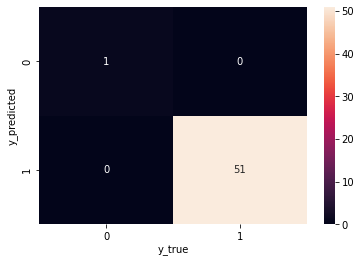

In [35]:
%matplotlib inline
sns.heatmap(cm_sever,annot = True)
plt.xlabel('y_true')
plt.ylabel('y_predicted')
plt.show()


In [36]:
model_sever.predict([[0,0,0,0,0,1,0,0,1]])

array([1], dtype=int64)

## C) For Injury cases : 

In [37]:
y_injury = df['Sever']

In [38]:
X_injury_train,X_injury_test,y_injury_train,y_injury_test = train_test_split(X,y_injury,test_size=0.1)

In [39]:
print('length of X_injury_train: ',len(X_injury_train))
print('length of X_injury_test: ',len(X_injury_test))
print('length of y_injury_train: ',len(y_injury_train))
print('length of y_injury_test: ',len(y_injury_test))

length of X_injury_train:  460
length of X_injury_test:  52
length of y_injury_train:  460
length of y_injury_test:  52


In [40]:
model_injury = tree.DecisionTreeClassifier()

In [41]:
model_injury.fit(X_injury_train,y_injury_train)

DecisionTreeClassifier()

In [42]:
y_injury_predicted = model_injury.predict(X_injury_test)

In [43]:
model_test_i = model_injury.score(X_injury_test,y_injury_test)
model_train_i = model_injury.score(X_injury_train,y_injury_train)

In [44]:
print('Test score: ',model_test_i)
print('Train score: ',model_train_i)

Test score:  1.0
Train score:  1.0


In [54]:
pickle.dump(model_injury, open('model_injury.pkl','wb'))

In [45]:
cm_injury = confusion_matrix(y_injury_test,y_injury_predicted)

In [46]:
cm_injury

array([[52]], dtype=int64)

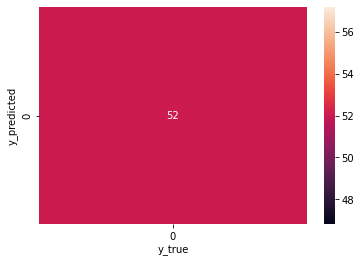

In [47]:
%matplotlib inline
sns.heatmap(cm_injury,annot = True)
plt.xlabel('y_true')
plt.ylabel('y_predicted')
plt.show()

# 2. Logistic Regression

In [ ]:
from sklearn.linear_model import Logistic Re